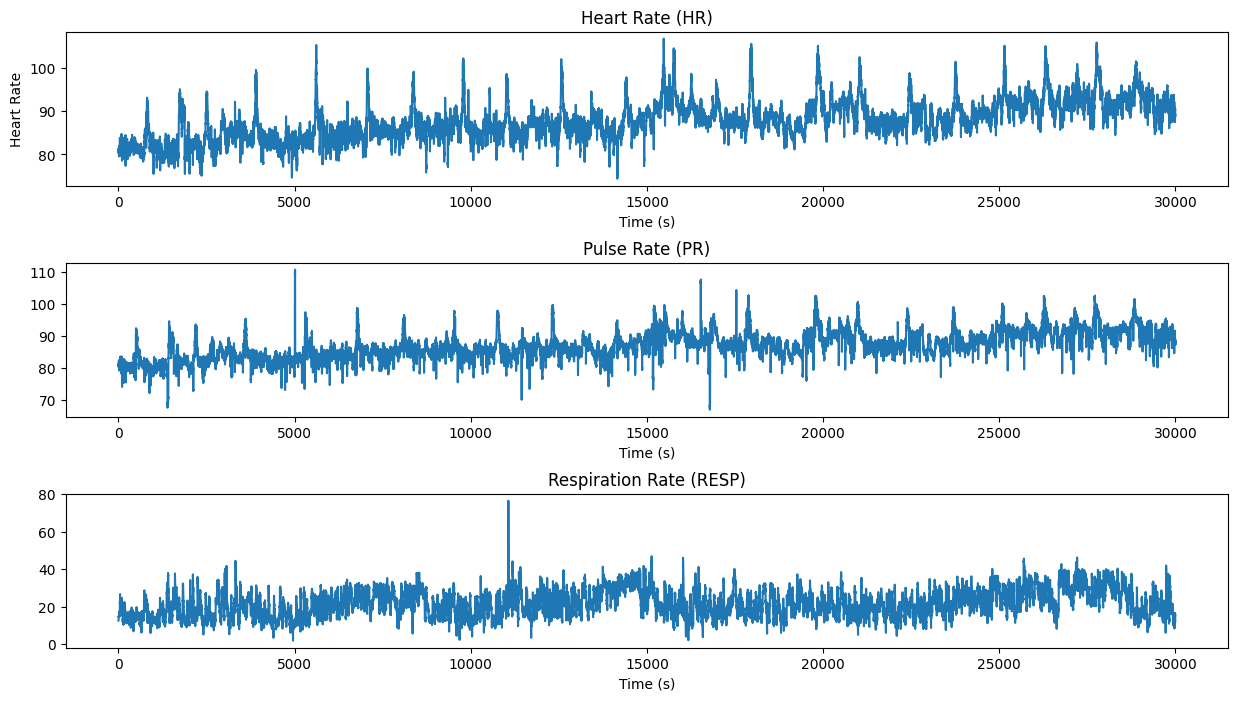

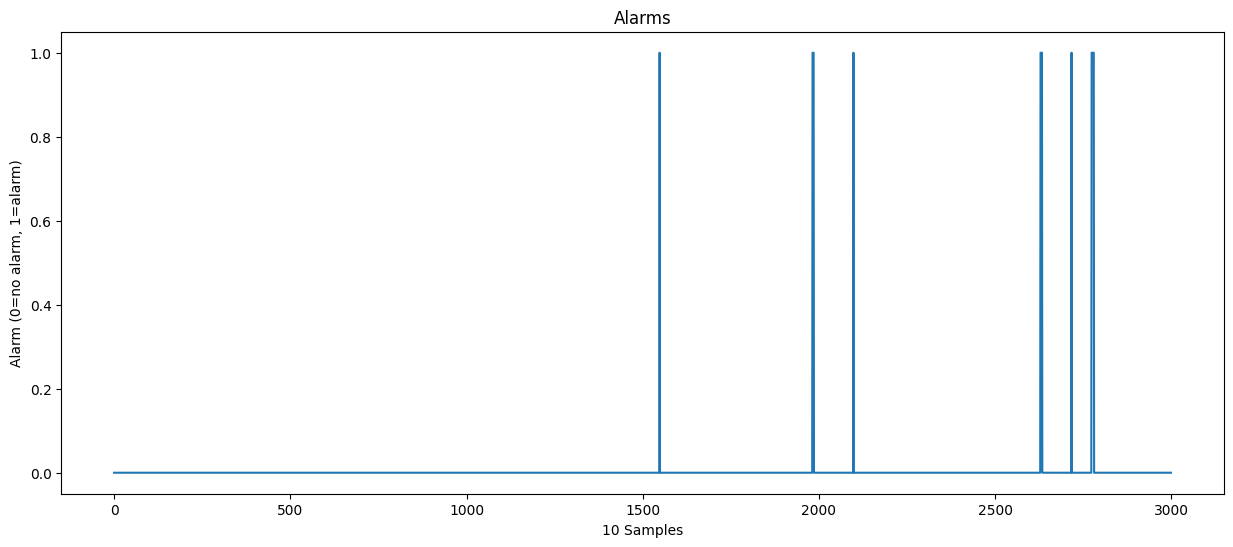

In [5]:
#importing libraries
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
data_file = scipy.io.loadmat('patient_data.mat')
data = data_file['data']
golden_alarms = data_file['golden_alarms']
time = np.arange(30000)
#Heart Rate
plt.figure(figsize=(15,8))
plt.subplot(311)
plt.title('Heart Rate (HR)')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate')
plt.plot(time, data[0, :])


#Pulse Rate
plt.subplot(312)
plt.title('Pulse Rate (PR)')
plt.xlabel('Time (s)')
plt.plot(time, data[1, :])


#Respiration Rate
plt.subplot(313)
plt.title('Respiration Rate (RESP)')
plt.xlabel('Time (s)')
plt.plot(time, data[2, :])


plt.subplots_adjust(hspace=0.5)


plt.show()
# Alarms
secs = np.arange(0, 3000, 1)
plt.figure(figsize=(15,6))
plt.plot(secs, golden_alarms[0])
plt.title("Alarms")
plt.ylabel("Alarm (0=no alarm, 1=alarm)")
plt.xlabel("10 Samples")
plt.show()

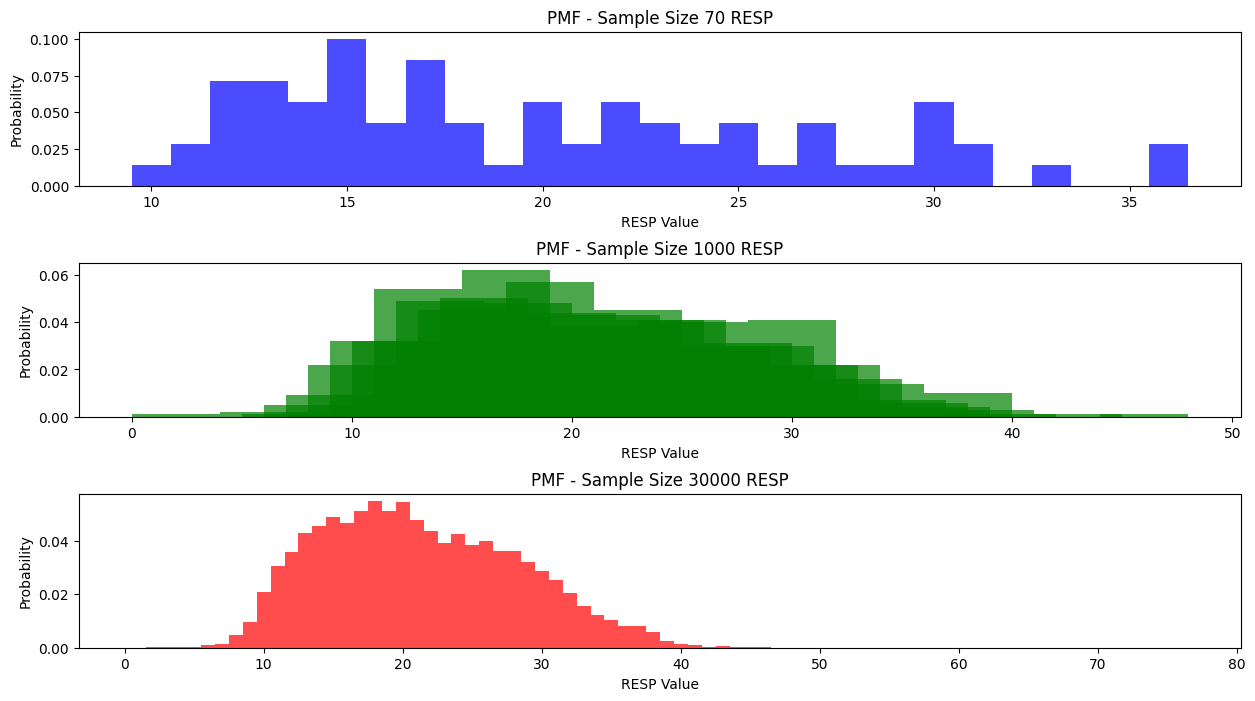

In [ ]:
#Task 1
#PMF
time_full = np.linspace(0, 30000, 30000)


def calculate_pmf(resp_sample):
    resp_floor = np.floor(resp_sample)
    unique_values, counts = np.unique(resp_floor, return_counts=True)
  
    pmf = counts / len(resp_sample)
    cdf = np.cumsum(pmf)
   
    return unique_values, pmf, cdf

resp = data[2, :]  # RESP data

# Sample 70 times
intervalSize_70 = np.linspace(0, len(resp) - 1, 70, dtype=int)
resp_70 = resp[intervalSize_70]
time_70 = time_full[intervalSize_70]
unique_70, pmf_70, cdf_70 = calculate_pmf(resp_70)


# Sample 1000 times
intervalSize_1000 = np.linspace(0, len(resp) - 1, 1000, dtype=int)
resp_1000 = resp[intervalSize_1000]
time_1000 = time_full[intervalSize_1000]
unique_1000, pmf_1000, cdf_1000 = calculate_pmf(resp_1000)


# Full dataset (30000 points)
unique_30000, pmf_30000, cdf_30000 = calculate_pmf(resp)

# Plot the PMF for each sample size
plt.figure(figsize=(15, 8))

# Plot Sample Size 70 RESP
plt.subplot(311)
plt.bar(unique_70, pmf_70, width=(unique_70[1] - unique_70[0]), alpha=0.7, color='b')
plt.title("PMF - Sample Size 70 RESP")
plt.xlabel("RESP Value")
plt.ylabel("Probability")


# Plot Sample Size 1000 RESP
plt.subplot(312)
plt.bar(unique_1000, pmf_1000, width=(unique_1000[1] - unique_1000[0]), alpha=0.7, color='g')
plt.title("PMF - Sample Size 1000 RESP")
plt.xlabel("RESP Value")
plt.ylabel("Probability")


# Plot Sample Size 30000 RESP
plt.subplot(313)
plt.bar(unique_30000, pmf_30000, width=(unique_30000[1] - unique_30000[0]), alpha=0.7, color='r')
plt.title("PMF - Sample Size 30000 RESP")
plt.xlabel("RESP Value")
plt.ylabel("Probability")


plt.subplots_adjust(hspace=0.5)
plt.show()

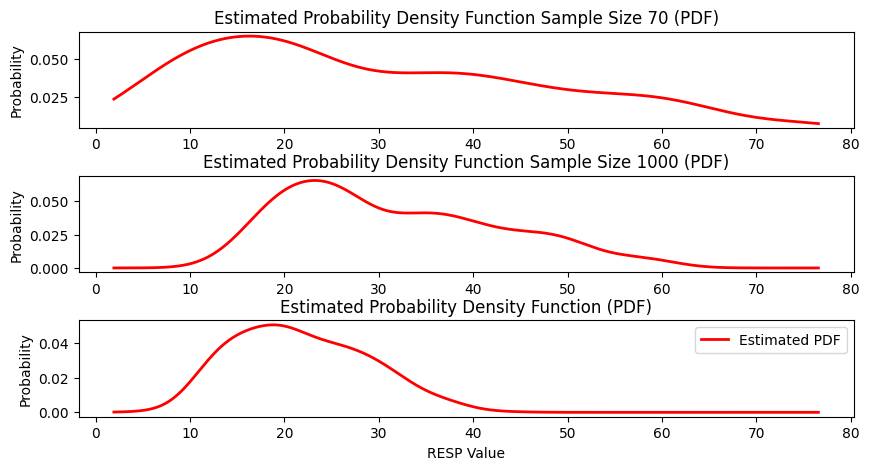

In [ ]:
#PDF
from scipy.stats import gaussian_kde

plt.figure(figsize=(10, 5))

# Normalize the dataset
resp_normalized = resp / np.sum(resp)


# KDE Estimation
kde = gaussian_kde(resp, bw_method=0.3)
x_range = np.linspace(min(resp), max(resp), 1000)

resp_normalized70 = resp_70 / np.sum(resp_70)
kde70 = gaussian_kde(resp_70, bw_method=0.3)
x_range70 = np.linspace(min(resp_70), max(resp_70), 1000)
plt.subplot(311)
plt.plot(x_range, kde70(x_range70), color='r', linewidth=2, label="Estimated PDF 70")
plt.ylabel("Probability")
plt.title("Estimated Probability Density Function Sample Size 70 (PDF)")

resp_normalized1000 = resp_1000 / np.sum(resp_1000)
kde1000 = gaussian_kde(resp_1000, bw_method=0.3)
x_range1000 = np.linspace(min(resp_1000), max(resp_1000), 1000)
plt.subplot(312)
plt.plot(x_range, kde70(x_range1000), color='r', linewidth=2, label="Estimated PDF 1000")
plt.ylabel("Probability")
plt.title("Estimated Probability Density Function Sample Size 1000 (PDF)")

# PDF (Smoothed)
plt.subplot(313)
plt.plot(x_range, kde(x_range), color='r', linewidth=2, label="Estimated PDF")

# Labels and legend
plt.xlabel("RESP Value")
plt.ylabel("Probability")
plt.title("Estimated Probability Density Function (PDF)")
plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.show()


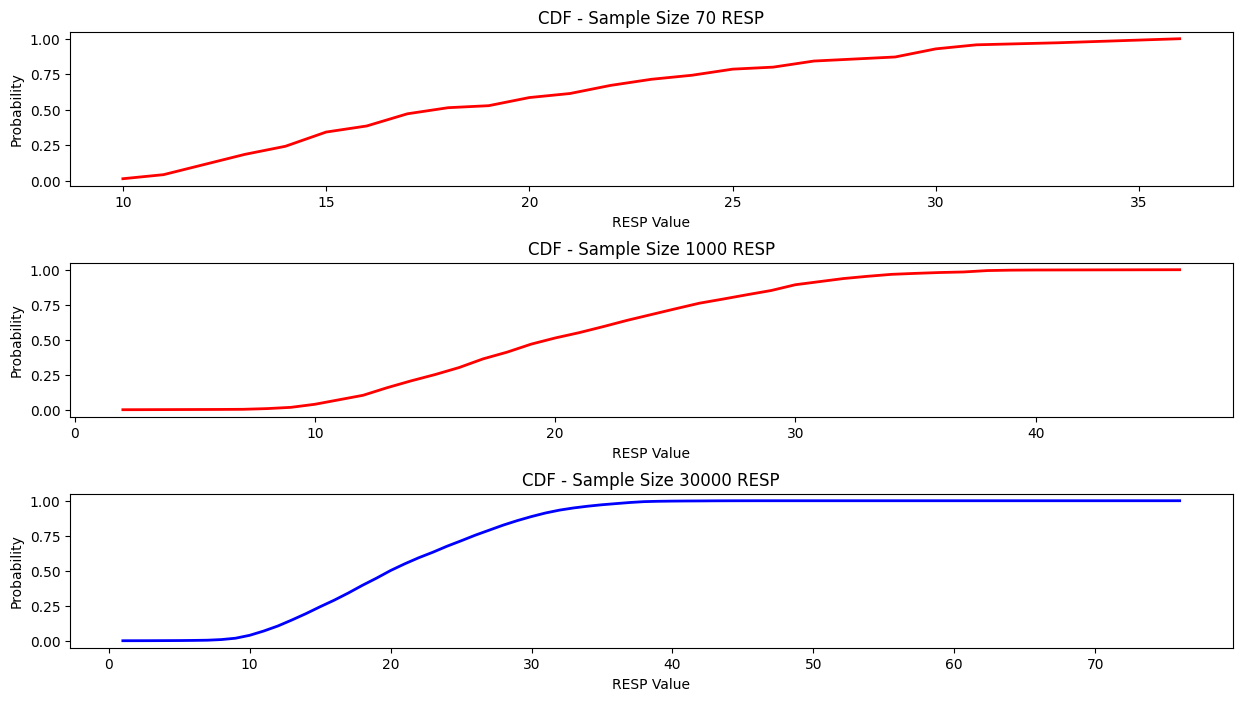

In [9]:
#CDF (uses same function outputs from PMF)
plt.figure(figsize=(15, 8))


plt.subplot(311)
plt.plot(unique_70, cdf_70, color='r', label="CDF", linewidth=2)
plt.title("CDF - Sample Size 70 RESP")
plt.xlabel("RESP Value")
plt.ylabel("Probability")


plt.subplot(312)
plt.plot(unique_1000, cdf_1000, color='r', label="CDF", linewidth=2)
plt.title("CDF - Sample Size 1000 RESP")
plt.xlabel("RESP Value")
plt.ylabel("Probability")


plt.subplot(313)
plt.plot(unique_30000, cdf_30000, color='b', label="CDF", linewidth=2)
plt.title("CDF - Sample Size 30000 RESP")
plt.xlabel("RESP Value")
plt.ylabel("Probability")


plt.subplots_adjust(hspace=0.5)
plt.show()


In [10]:
#b) MIN using np.unique
min_pmf = np.min(pmf_30000)
max_pmf = np.max(pmf_30000)
print(f"Min PMF: {min_pmf}")
print(f"Max PMF: {max_pmf}")


min_pdf = np.min(kde(x_range))
max_pdf = np.max(kde(x_range))
print(f"Min PDF: {min_pdf}")
print(f"Max PDF: {max_pdf}")


Min PMF: 3.3333333333333335e-05
Max PMF: 0.0549
Min PDF: 7.468611749744753e-13
Max PDF: 0.05061107518845788


In [11]:
# Find a (P(X ≤ a) ≤ 0.02) by finding the smallest x such that CDF(x) ≥ 0.02
a_index = np.where(cdf_30000 >= 0.02)[0][0]
a_value = unique_30000[a_index]


# Find b (P(X ≤ b) ≥ 0.98) by finding the smallest x such that CDF(x) ≥ 0.98
b_index = np.where(cdf_30000 >= 0.98)[0][0]
b_value = unique_30000[b_index]


print(f"a (P(X ≤ a) ≤ 0.02): {a_value}")
print(f"b (P(X ≤ b) ≥ 0.98): {b_value}")


a (P(X ≤ a) ≤ 0.02): 10.0
b (P(X ≤ b) ≥ 0.98): 37.0


In [13]:
# mean of RESP
mean = 0.0
for i in range(30000):
    mean += resp[i]
mean /= 30000.0


# standard deviation of RESP
standard_deviation = 0.0
for i in range(30000):
    standard_deviation += (resp[i] - mean) ** 2
standard_deviation /= 29999
standard_deviation = standard_deviation ** 0.5

print(f"Mean: {mean}")
print(f"Standard Deviation: {standard_deviation}")


Mean: 21.74181771219676
Standard Deviation: 7.10429223403854


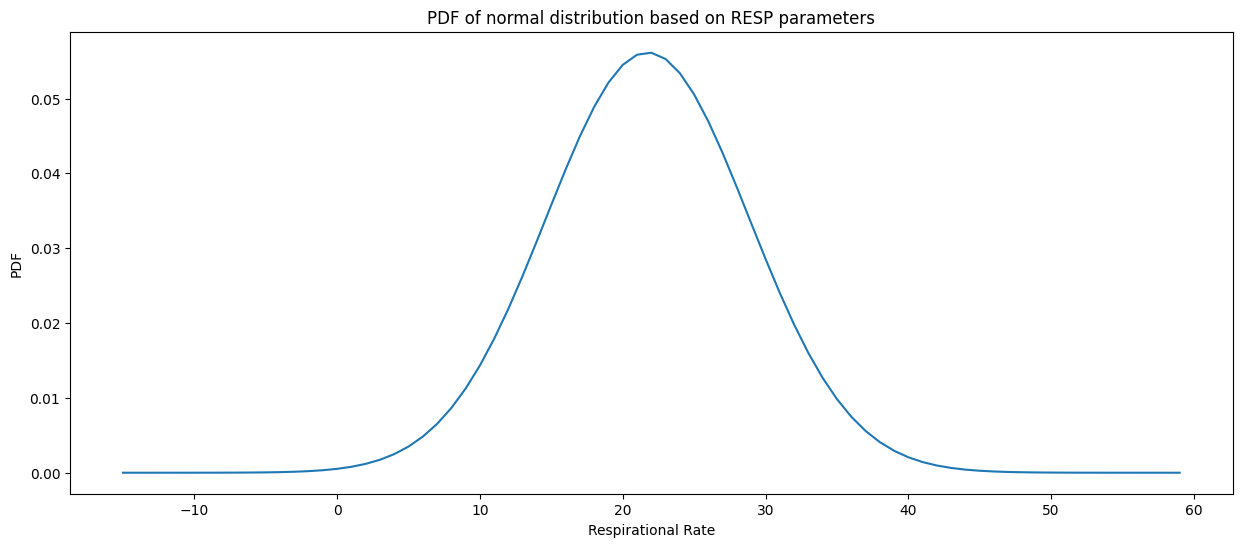

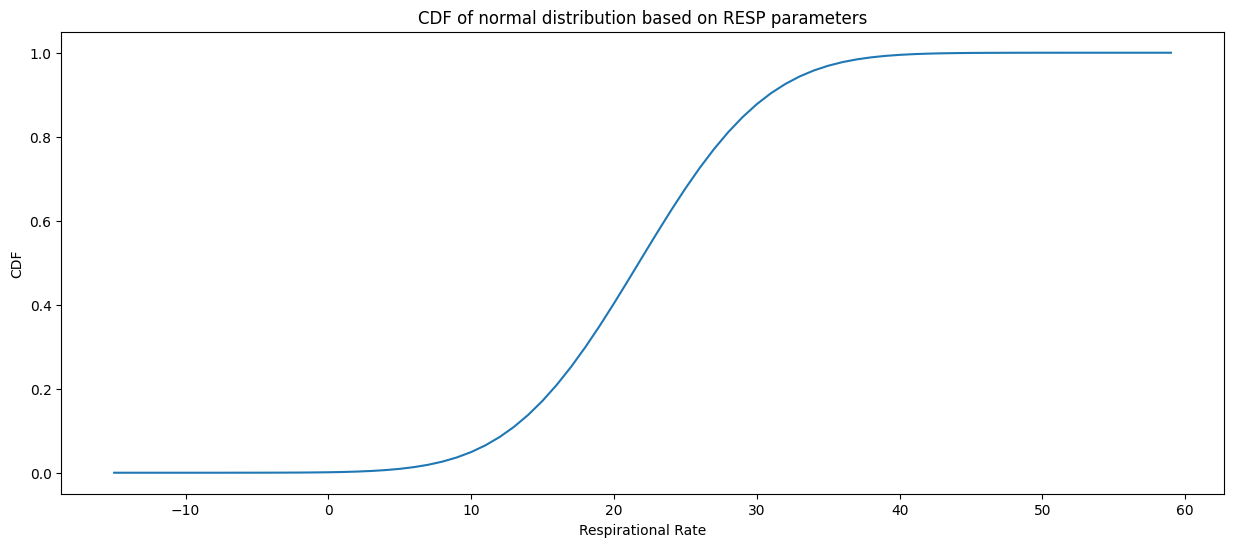

In [21]:
from scipy.stats import norm

mean_resp = np.mean(resp)
std_resp = np.std(resp)

secs = np.arange(-15.0, 60.0, 1)

pdf = norm.pdf(secs, loc=mean_resp, scale=std_resp)
cdf = norm.cdf(secs, loc=mean_resp, scale=std_resp)

# plot pdf
secs = np.arange(-15.0, 60.0, 1)
plt.figure(figsize=(15,6))
plt.plot(secs, pdf)
plt.title("PDF of normal distribution based on RESP parameters")
plt.ylabel("PDF")
plt.xlabel("Respirational Rate")
plt.show()
# plot cdf
secs = np.arange(-15.0, 60.0, 1)
plt.figure(figsize=(15,6))
plt.plot(secs, cdf)
plt.title("CDF of normal distribution based on RESP parameters")
plt.ylabel("CDF")
plt.xlabel("Respirational Rate")
plt.show()


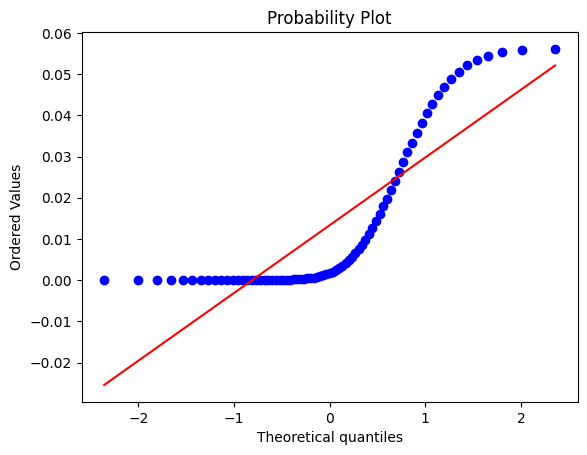

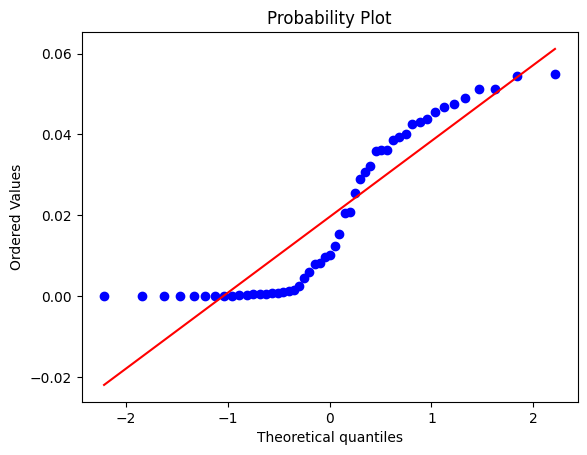

In [22]:
# compare normal and 1.1 30,000 distribution
scipy.stats.probplot(pdf, plot=plt)
plt.show()


scipy.stats.probplot(pmf_30000, plot=plt)
plt.show()

In [ ]:
#Task 2
#importing libraries
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import math
data_file = scipy.io.loadmat('patient_data.mat')
data = data_file['data']
golden_alarms = data_file['golden_alarms']
time = np.arange(30000)
hr = data[0, :]
pr = data[1, :]
resp = data[2, :]


In [24]:
def calculate_pmf(resp_sample):
    # Floor the sample values and calculate unique values and their counts
    resp_floor = np.floor(resp_sample)
    unique_values, counts = np.unique(resp_floor, return_counts=True)
   
    # Normalize the counts by the total number of samples to get probabilities
    pmf = counts / len(resp_sample)
   
    # Calculate the CDF by taking the cumulative sum of the PMF
    cdf = np.cumsum(pmf)
   
    return unique_values, pmf, cdf  


In [ ]:
#2.1
#a
#For RESP: a: 10 b: 37
#For HR: a: 80 b: 98
hr_unique_30000, hr_pmf_30000, hr_cdf_30000 = calculate_pmf(hr) #function from task 1: Part1: a.1

hr_a_index = np.where(hr_cdf_30000 >= 0.02)[0][0]
hr_a_value = hr_unique_30000[hr_a_index]


hr_b_index = np.where(hr_cdf_30000 >= 0.98)[0][0]
hr_b_value = hr_unique_30000[hr_b_index]

print(f"hr_a (P(X ≤ a) ≤ 0.02): {hr_a_value}")
print(f"hr_b (P(X ≤ b) ≥ 0.98): {hr_b_value}")

#For PR: a: 79 b: 97
pr_unique_30000, pr_pmf_30000, pr_cdf_30000 = calculate_pmf(pr)

pr_a_index = np.where(pr_cdf_30000 >= 0.02)[0][0]
pr_a_value = pr_unique_30000[pr_a_index]

pr_b_index = np.where(pr_cdf_30000 >= 0.98)[0][0]
pr_b_value = pr_unique_30000[pr_b_index]

print(f"pr_a (P(X ≤ a) ≤ 0.02): {pr_a_value}")
print(f"pr_b (P(X ≤ b) ≥ 0.98): {pr_b_value}")


hr_a (P(X ≤ a) ≤ 0.02): 80.0
hr_b (P(X ≤ b) ≥ 0.98): 98.0
pr_a (P(X ≤ a) ≤ 0.02): 79.0
pr_b (P(X ≤ b) ≥ 0.98): 97.0


In [ ]:
#b
# from task 1.1 part c
a_value = 10.0
b_value = 37.0

# from task 1.2 part d
#a_value = 7.18
#b_value = 36.31

#resp
resp_alarm = np.zeros(3000)
for i in range(len(resp)):
    if (resp[i] < a_value or resp[i] > b_value):
        resp_alarm[i//10] = 1

#hr
hr_alarm = np.zeros(3000)
for i in range(len(hr)):
    if (hr[i] < hr_a_value or hr[i] > hr_b_value):
        hr_alarm[i//10] = 1

#pr
pr_alarm = np.zeros(3000)
for i in range(len(pr)):
    if (pr[i] < pr_a_value or pr[i] > pr_b_value):
        pr_alarm[i//10] = 1


In [27]:
#c
maj_vote = np.zeros(3000)
for i in range(3000):
    sum_maj = resp_alarm[i] + hr_alarm[i] + pr_alarm[i]
    if(sum_maj >= 2):
        maj_vote[i] = 1

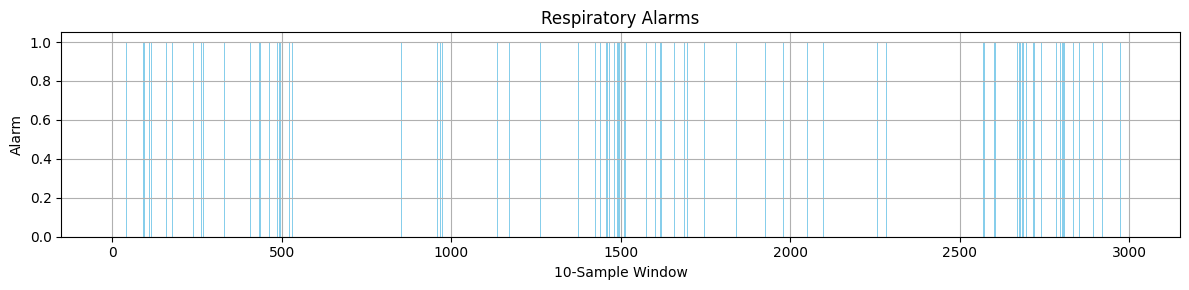

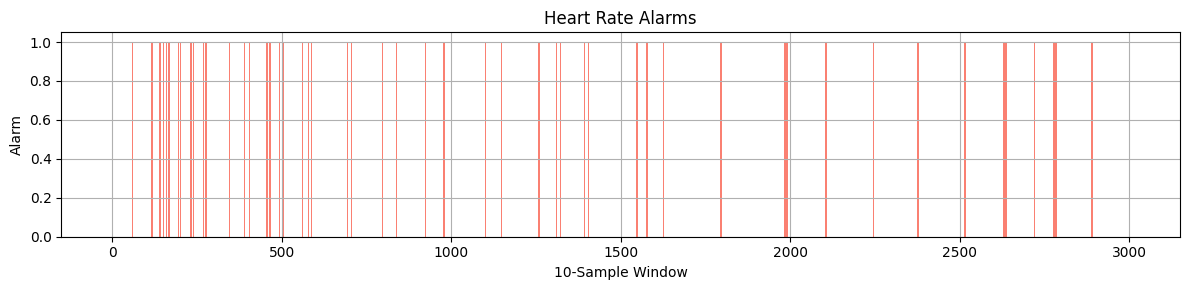

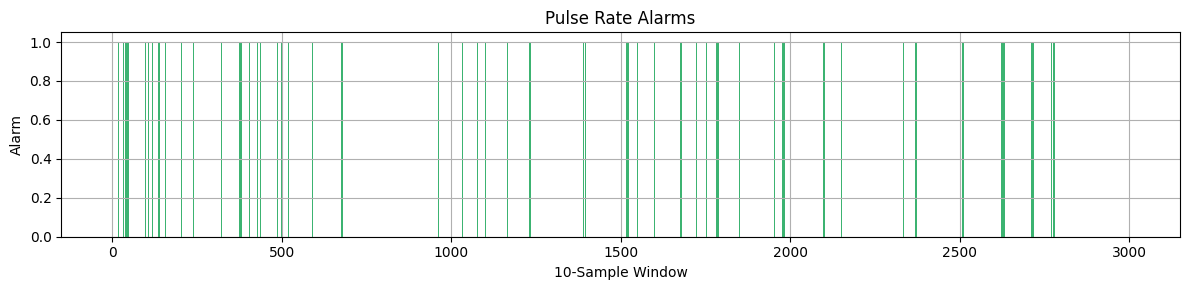

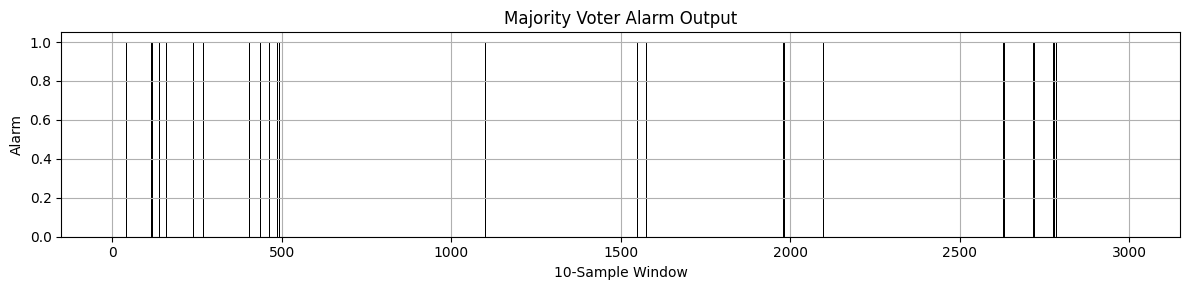

In [28]:
#d plotting
x = np.arange(3000)


# Plot 1: Respiratory Alarms
plt.figure(figsize=(12, 3))
plt.bar(x, resp_alarm, color='skyblue')
plt.title('Respiratory Alarms')
plt.xlabel('10-Sample Window')
plt.ylabel('Alarm')
plt.grid(True)
plt.tight_layout()


# Plot 2: Heart Rate Alarms
plt.figure(figsize=(12, 3))
plt.bar(x, hr_alarm, color='salmon')
plt.title('Heart Rate Alarms')
plt.xlabel('10-Sample Window')
plt.ylabel('Alarm')
plt.grid(True)
plt.tight_layout()


# Plot 3: Pulse Rate Alarms
plt.figure(figsize=(12, 3))
plt.bar(x, pr_alarm, color='mediumseagreen')
plt.title('Pulse Rate Alarms')
plt.xlabel('10-Sample Window')
plt.ylabel('Alarm')
plt.grid(True)
plt.tight_layout()


# Plot 4: Majority Voter
plt.figure(figsize=(12, 3))
plt.bar(x, maj_vote, color='black')
plt.title('Majority Voter Alarm Output')
plt.xlabel('10-Sample Window')
plt.ylabel('Alarm')
plt.grid(True)
plt.tight_layout()


plt.show()


In [31]:
# task 2.2
# part a)
# calculate P(False Alarm), P(Miss Detection)
false_alarm_count = 0.0
miss_detection_count = 0.0
physician_abnormalities = 0.0
physician_no_abnormalities = 0.0
for i in range(len(golden_alarms[0])):
    if (golden_alarms[0][i] == 0.0): # if physician indicates no abnormality
        physician_no_abnormalities += 1.0 # increment physician no abnormalities count
        if (maj_vote[i] == 1.0): # if voter raised alarm despite physician indicating no abnormality
            false_alarm_count += 1.0 # increment false alarm count
    else: # if physician indicated abnormality
        physician_abnormalities += 1.0 # increment physician abnormality count
        if (maj_vote[i] == 0.0): # if voter did not raise alarm despite physician indicating abnormality
            miss_detection_count += 1.0 # increment miss detection count


p_false_alarm = false_alarm_count / physician_no_abnormalities # the probability of a false alarm is the number of false alarms over the number of times the physician indicated no abnormality
p_miss_detection = miss_detection_count / physician_abnormalities # the probability of a miss detection is the number of miss detections over the number of times the physician indicated abnormality
print(f"P(False Alarm: {p_false_alarm}")
print(f"P(Miss Detection: {p_miss_detection}")


P(False Alarm: 0.02314659510231466
P(Miss Detection: 0.0


In [33]:
# part b)
# calculate P(Error)
false_alarm_error = 0.0
miss_detection_error = 0.0
for i in range(len(golden_alarms[0])):
    if (golden_alarms[0][i] == 0.0 and maj_vote[i] == 1.0): # if there is a false alarm
        false_alarm_error += 1.0 # increment false_alarm count
    elif (golden_alarms[0][i] == 1.0 and maj_vote[i] == 0.0): # if there is a miss detection
        miss_detection_error += 1.0 # increment miss detection count


p_error = (false_alarm_error + miss_detection_error) / len(golden_alarms[0])
print(f"P(Error): {p_error}")


P(Error): 0.023
